In [90]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [91]:
# Load the data
data = pd.read_csv('/Users/dr/Documents/GitHub/MBS_RiskManagement/extracted_data/regression_data.csv')

In [92]:
print("Dataset Info:")
print(data.info())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20323122 entries, 0 to 20323121
Data columns (total 20 columns):
 #   Column                                  Dtype  
---  ------                                  -----  
 0   Loan Sequence Number                    object 
 1   Credit Score                            float64
 2   First Payment Date                      object 
 3   Occupancy Status                        object 
 4   Original Combined Loan-to-Value (CLTV)  float64
 5   Original Debt-to-Income (DTI) Ratio     float64
 6   Original UPB                            float64
 7   Original Loan-to-Value (LTV)            float64
 8   Original Interest Rate                  float64
 9   Property State                          object 
 10  Original Loan Term                      float64
 11  Number of Borrowers                     float64
 12  Current Actual UPB                      float64
 13  Current Loan Delinquency Status         float64
 14  Loan Age          

In [93]:
print(data.describe())

       Credit Score  Original Combined Loan-to-Value (CLTV)  \
count  2.032312e+07                            2.032312e+07   
mean   7.524425e+02                            7.307062e+01   
std    1.322032e+02                            1.817295e+01   
min    3.000000e+02                            1.000000e+00   
25%    7.200000e+02                            6.300000e+01   
50%    7.600000e+02                            7.700000e+01   
75%    7.880000e+02                            8.500000e+01   
max    9.999000e+03                            9.990000e+02   

       Original Debt-to-Income (DTI) Ratio  Original UPB  \
count                         2.032312e+07  2.032312e+07   
mean                          5.500394e+01  2.696437e+05   
std                           1.387154e+02  1.453568e+05   
min                           1.000000e+00  1.000000e+03   
25%                           2.800000e+01  1.600000e+05   
50%                           3.600000e+01  2.420000e+05   
75%         

In [94]:
missing = data.isnull().sum()
print("Missing values per column:\n", missing[missing > 0])

Missing values per column:
 Loan Sequence Number                           3
Credit Score                                   3
First Payment Date                             3
Occupancy Status                               3
Original Combined Loan-to-Value (CLTV)         3
Original Debt-to-Income (DTI) Ratio            3
Original UPB                                   3
Original Loan-to-Value (LTV)                   3
Original Interest Rate                         3
Property State                                 3
Original Loan Term                             3
Number of Borrowers                            3
Current Actual UPB                             3
Current Loan Delinquency Status             8200
Loan Age                                       3
Remaining Months to Legal Maturity             3
Current Interest Rate                          3
Current Deferred UPB                           3
Estimated Loan-to-Value (ELTV)            557555
dtype: int64


In [95]:
print("Total records:", len(data))
print("Total unique loans:", data['Loan Sequence Number'].nunique())

Total records: 20323122
Total unique loans: 20323119


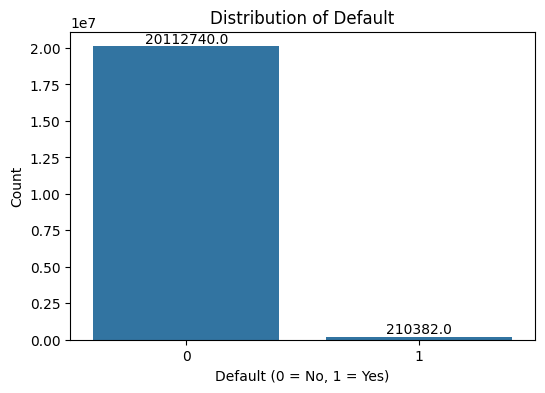

In [96]:
# Distribution of Default
plt.figure(figsize=(6, 4))
sns.countplot(x='Default', data=data)
plt.title('Distribution of Default')
plt.xlabel('Default (0 = No, 1 = Yes)')
plt.ylabel('Count')

# Add the number of occurrences on top of each bar
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), 
                       textcoords='offset points')
plt.show()

**Number of Borrowers** 

The number of borrowers who are obligated to repay the mortgage note. Multiple borrowers may reduce risk. 

Guide notes: 99 for missing.


In [97]:
# Clean Number of Borrowers
data['Number of Borrowers'] = pd.to_numeric(data['Number of Borrowers'], errors='coerce')
data['Number of Borrowers'] = data['Number of Borrowers'].apply(
    lambda x: 99 if pd.isna(x) else x
)

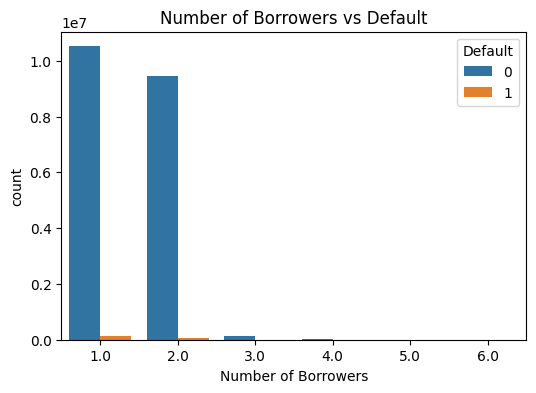

In [98]:
# Number of Borrowers vs Default
plt.figure(figsize=(6, 4))
sns.countplot(x='Number of Borrowers', hue='Default', data=data[data['Number of Borrowers'] != 99])  # Exclude missing (99)
plt.title('Number of Borrowers vs Default')
plt.show()

**Property State** 

The two-letter postal abbreviation for the state in which the property is located. Captures regional economic factors. 

Guide notes: U.S. states only.

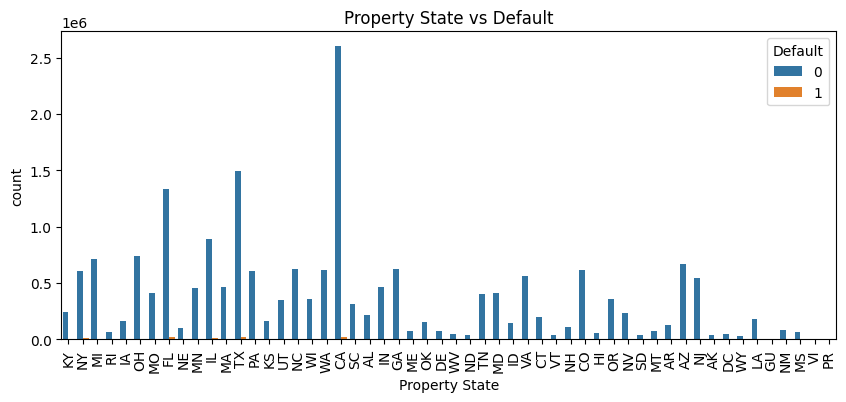

In [99]:
# Clean Property State (ensure categorical, no numeric conversion needed)
# Assuming it's already a string, no cleaning beyond ensuring valid states can be added if needed

# Property State vs Default
plt.figure(figsize=(10, 4))
sns.countplot(x='Property State', hue='Default', data=data)
plt.title('Property State vs Default')
plt.xticks(rotation=90)
plt.show()

**Occupancy Status** 

The classification for the property occupancy status at the time the loan was originated. Investment properties have higher risk. 

Guide notes: O = Owner Occupied, S = Second Home, I = Investment Property, 9 = Unknown.


In [100]:
# Clean Occupancy Status
data['Occupancy Status'] = data['Occupancy Status'].astype(str).str.strip()
data['Occupancy Status'] = data['Occupancy Status'].apply(
    lambda x: '9' if x not in ['O', 'S', 'I'] else x
)

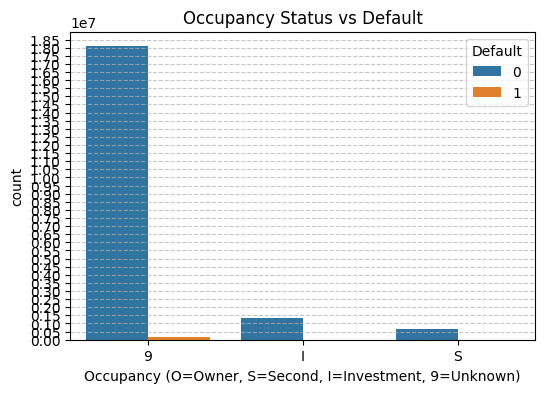

In [101]:
# Occupancy Status vs Default
plt.figure(figsize=(6, 4))
sns.countplot(x='Occupancy Status', hue='Default', data=data)
plt.title('Occupancy Status vs Default')
plt.xlabel('Occupancy (O=Owner, S=Second, I=Investment, 9=Unknown)')

plt.gca().yaxis.set_major_locator(plt.MultipleLocator(500000))
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

**Credit Score**

The standardized credit score used to evaluate the borrower during the loan origination process. Lower scores indicate higher risk. 

Guide notes: FICO score, masked as 300 for <300, 850 for >850, or 9999 for missing.

In [102]:
# Clean Credit Score based on guide notes
data['Credit Score'] = pd.to_numeric(data['Credit Score'], errors='coerce')
data['Credit Score'] = data['Credit Score'].apply(
    lambda x: 300 if x < 300 else 850 if x > 850 else 9999 if pd.isna(x) else x
)

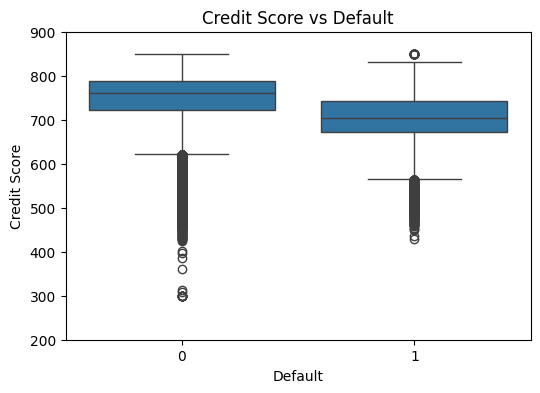

In [103]:
# Credit Score vs Default
plt.figure(figsize=(6, 4))
sns.boxplot(x='Default', y='Credit Score', data=data)
plt.title('Credit Score vs Default')
plt.ylim(200, 900)
plt.show()

**Original Loan Term** 

The number of months in which the loan is scheduled to be repaid. Longer terms may reduce monthly payments but increase long-term risk. 

Guide notes: In months, e.g., 360 for 30-year loans.

In [104]:
# Clean Original Loan Term (no capping needed, just ensure numeric)
data['Original Loan Term'] = pd.to_numeric(data['Original Loan Term'], errors='coerce')

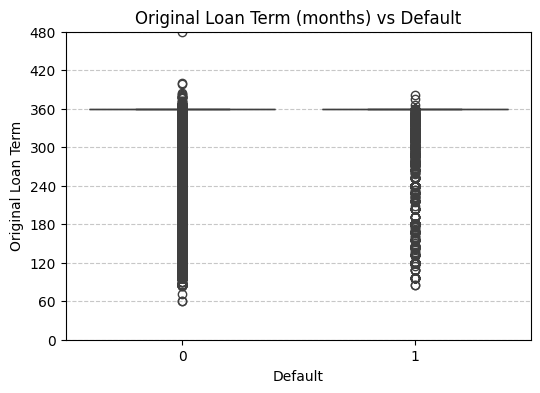

In [105]:
# Original Loan Term vs Default
plt.figure(figsize=(6, 4))
sns.boxplot(x='Default', y='Original Loan Term', data=data)
plt.title('Original Loan Term (months) vs Default')
plt.ylim(0, 480)  # Reasonable upper limit (e.g., 40 years in months)
#grid yaxis to each 5 years (60 months)
plt.yticks(range(0, 481, 60), [str(i) for i in range(0, 481, 60)])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**Loan Age**

The number of scheduled monthly payments that have elapsed since the loan was originated. Helps capture loan seasoning. 

Guide notes: In months, 999 for missing.

In [106]:
# Clean Loan Age
data['Loan Age'] = pd.to_numeric(data['Loan Age'], errors='coerce')
data['Loan Age'] = data['Loan Age'].apply(
    lambda x: 999 if pd.isna(x) else x
)

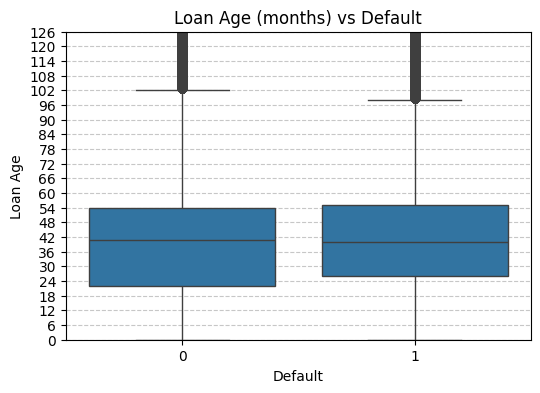

In [107]:
# Loan Age vs Default
plt.figure(figsize=(6, 4))
sns.boxplot(x='Default', y='Loan Age', data=data[data['Loan Age'] != 999])  # Exclude missing (999)
plt.title('Loan Age (months) vs Default')
plt.ylim(0, 120)  #  upper limit (e.g., 10 years in months)

plt.yticks(range(0, 128, 6))
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

**Remaining Months to Legal Maturity** 

The number of months remaining until the loan is scheduled to mature. Shorter terms may indicate higher risk near maturity. 

Guide notes: In months, 999 for missing.


In [108]:
# Clean Remaining Months to Legal Maturity
data['Remaining Months to Legal Maturity'] = pd.to_numeric(data['Remaining Months to Legal Maturity'], errors='coerce')
data['Remaining Months to Legal Maturity'] = data['Remaining Months to Legal Maturity'].apply(
    lambda x: 999 if pd.isna(x) else x
)

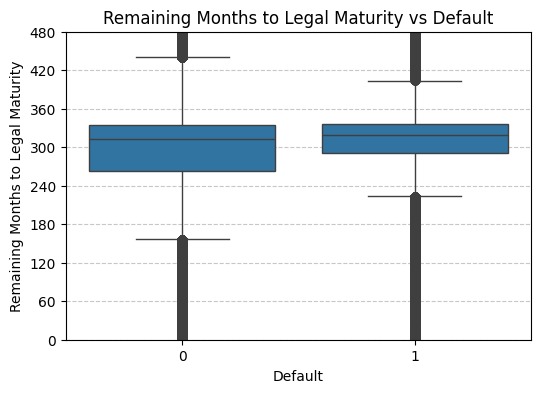

In [109]:
# Remaining Months to Legal Maturity vs Default
plt.figure(figsize=(6, 4))
sns.boxplot(x='Default', y='Remaining Months to Legal Maturity', data=data[data['Remaining Months to Legal Maturity'] != 999])  # Exclude missing (999)
plt.title('Remaining Months to Legal Maturity vs Default')
plt.ylim(0, 480)  # Reasonable upper limit (e.g., 40 years in months)

plt.yticks(range(0, 481, 60), [str(i) for i in range(0, 481, 60)])
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

**Current Interest Rate** 

The interest rate on the loan as of the end of the monthly reporting period. Adjustments can affect affordability. 

Guide notes: Reported to the nearest eighth of a percent, 99.999 for missing.

In [110]:
# Clean Current Interest Rate
data['Current Interest Rate'] = pd.to_numeric(data['Current Interest Rate'], errors='coerce')
data['Current Interest Rate'] = data['Current Interest Rate'].apply(
    lambda x: 99.999 if pd.isna(x) else x
)

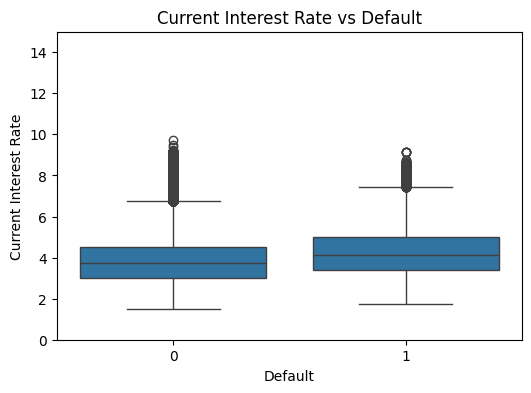

In [111]:
# Current Interest Rate vs Default
plt.figure(figsize=(6, 4))
sns.boxplot(x='Default', y='Current Interest Rate', data=data[data['Current Interest Rate'] != 99.999])  # Exclude missing (99.999)
plt.title('Current Interest Rate vs Default')
plt.ylim(0, 15)  # Reasonable upper limit (e.g., 15%)
plt.show()

**Original Interest Rate** 
The interest rate on the loan as stated on the note at the time the loan was originated. Higher rates may lead to higher payments and defaults. 

Guide notes: Reported to the nearest eighth of a percent.

In [112]:
# Clean Original Interest Rate (no capping needed, just ensure numeric)
data['Original Interest Rate'] = pd.to_numeric(data['Original Interest Rate'], errors='coerce')

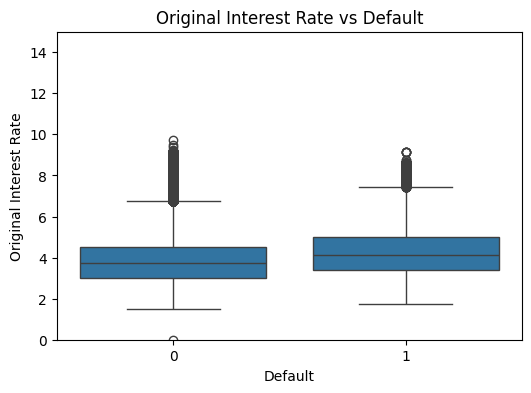

In [113]:
# Original Interest Rate vs Default
plt.figure(figsize=(6, 4))
sns.boxplot(x='Default', y='Original Interest Rate', data=data)
plt.title('Original Interest Rate vs Default')
plt.ylim(0, 15)  # Reasonable upper limit for interest rates (e.g., 15%)
plt.show()

**Original Loan-to-Value (LTV)**

The ratio of the original loan amount to the property value at origination, providing additional context to Original Combined Loan-to-Value (CLTV). 

Guide notes: Rounded to nearest integer, 999 for missing.

In [114]:
# Clean Original Loan-to-Value (LTV)
data['Original Loan-to-Value (LTV)'] = pd.to_numeric(data['Original Loan-to-Value (LTV)'], errors='coerce')
data['Original Loan-to-Value (LTV)'] = data['Original Loan-to-Value (LTV)'].apply(
    lambda x: 999 if pd.isna(x) else x
)

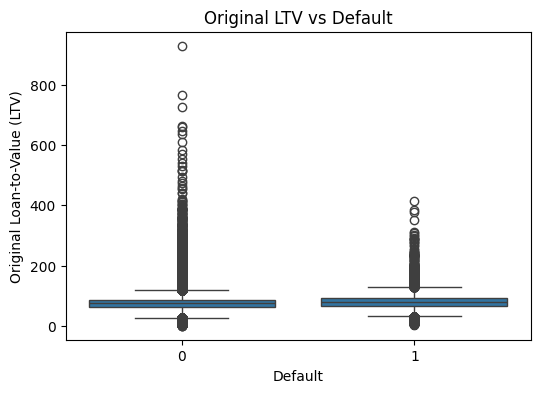

In [115]:
# Original LTV vs Default
plt.figure(figsize=(6, 4))
sns.boxplot(x='Default', y='Original Loan-to-Value (LTV)', data=data[data['Original Loan-to-Value (LTV)'] != 999])  # Exclude missing (999)
plt.title('Original LTV vs Default')
# plt.ylim(0, 100)  # Reasonable upper limit for LTV
plt.show()

**Original Combined Loan-to-Value (CLTV)** 

The ratio of the original loan amount and any subordinate lien amount to the property value at origination. Higher ratios increase default risk. 

Guide notes: Rounded to nearest integer, 999 for missing.

In [116]:
# Clean Original Combined Loan-to-Value (CLTV)
data['Original Combined Loan-to-Value (CLTV)'] = pd.to_numeric(data['Original Combined Loan-to-Value (CLTV)'], errors='coerce')
data['Original Combined Loan-to-Value (CLTV)'] = data['Original Combined Loan-to-Value (CLTV)'].apply(
    lambda x: 999 if pd.isna(x) else x
)

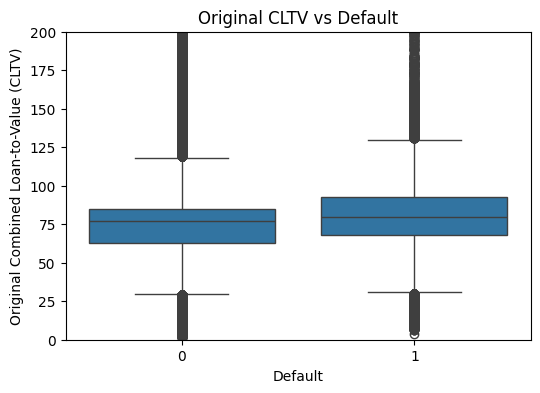

In [117]:
# Original CLTV vs Default
plt.figure(figsize=(6, 4))
sns.boxplot(x='Default', y='Original Combined Loan-to-Value (CLTV)', data=data[data['Original Combined Loan-to-Value (CLTV)'] != 999])  # Exclude missing (999)
plt.title('Original CLTV vs Default')
plt.ylim(0, 200)  # Reasonable upper limit for CLTV
plt.show()

**Original Debt-to-Income (DTI) Ratio**

The ratio of the borrower's total monthly debt payments to gross monthly income at origination. Higher DTI suggests financial strain. 

Guide notes: Rounded to nearest integer, 999 for missing or not considered.

In [118]:
# Clean Original Debt-to-Income (DTI) Ratio
data['Original Debt-to-Income (DTI) Ratio'] = pd.to_numeric(data['Original Debt-to-Income (DTI) Ratio'], errors='coerce')
data['Original Debt-to-Income (DTI) Ratio'] = data['Original Debt-to-Income (DTI) Ratio'].apply(
    lambda x: 999 if pd.isna(x) else x
)

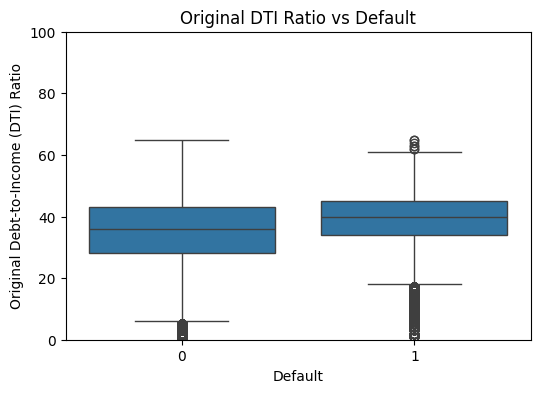

In [119]:
# Original DTI Ratio vs Default
plt.figure(figsize=(6, 4))
sns.boxplot(x='Default', y='Original Debt-to-Income (DTI) Ratio', data=data)
plt.title('Original DTI Ratio vs Default')
plt.ylim(0, 100)
plt.show()

**First Payment Date** 

The date of the first scheduled payment, offering a temporal anchor for loan age and performance. 

Guide notes: Format YYYYMMDD, parsed as datetime64[ns].

In [120]:
# Convert First Payment Date to datetime
data['First Payment Date'] = pd.to_datetime(data['First Payment Date'], errors='coerce')

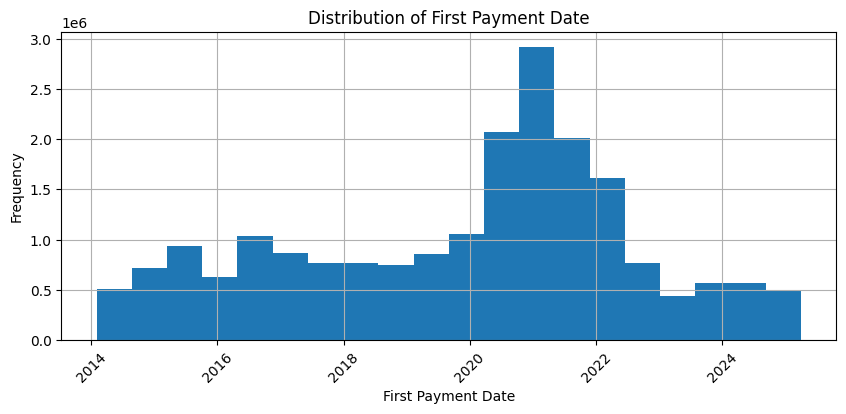

In [121]:
# First Payment Date Distribution
plt.figure(figsize=(10, 4))
data['First Payment Date'].dropna().hist(bins=20)
plt.title('Distribution of First Payment Date')
plt.xlabel('First Payment Date')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

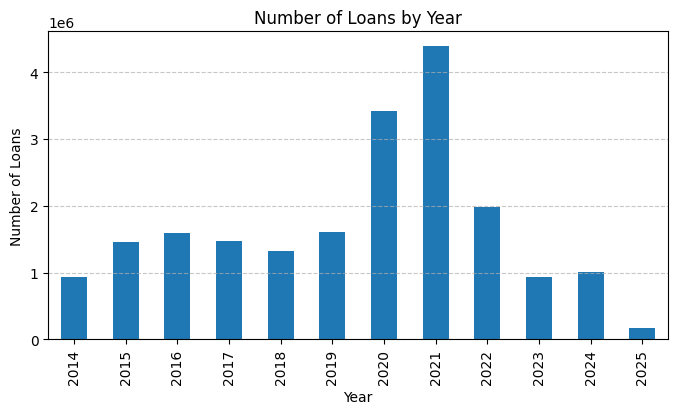

In [ ]:
# Number of loans across years
plt.figure(figsize=(8, 4))
data['First Payment Date'].dropna().dt.year.value_counts().sort_index().plot(kind='bar')
plt.title('Number of Loans by Year')
plt.xlabel('Year')
plt.ylabel('Number of Loans')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**Current Actual UPB** 

The unpaid principal balance of the loan as of the end of the monthly reporting period. Higher UPB may correlate with defaults. 

Guide notes: Rounded to nearest $1,000, 000000 for zero balance.

In [122]:
# Clean Current Actual UPB
data['Current Actual UPB'] = pd.to_numeric(data['Current Actual UPB'], errors='coerce')
data['Current Actual UPB'] = data['Current Actual UPB'].apply(
    lambda x: 0 if x == 0 or pd.isna(x) else x
)

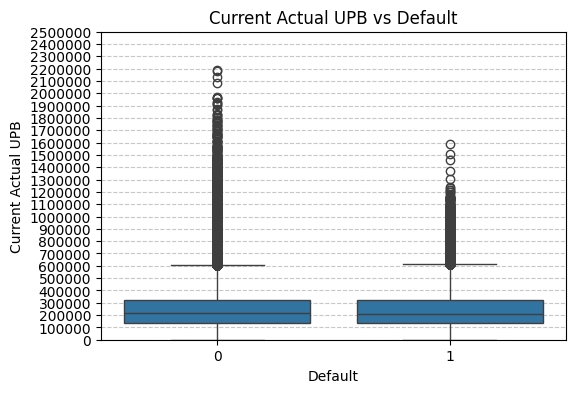

In [123]:
# Current Actual UPB vs Default
plt.figure(figsize=(6, 4))
sns.boxplot(x='Default', y='Current Actual UPB', data=data[data['Current Actual UPB'] != 0])  # Exclude zero balance (000000)
plt.title('Current Actual UPB vs Default')
plt.ylim(0, 2500000)  # Reasonable upper limit in $1,000s

plt.yticks(range(0, 2500001, 100000), [str(i) for i in range(0, 2500001, 100000)])
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()